# Capstone Mini-Project: Data Wrangling
- Exploratory Data Analysis of Airbnb Dataset
<br>
- Author: Ashley Jiangyang

# Table of Contents
1. [Introduction and Project Goals](#Intro)
2. [Data Management](#Dm) <br>
    2.1 [The Original Data](#Od)<br>
    2.2 [Drop Meaningless Features](#Dropfeatures)<br>
    2.3 [Re-code the Features](#Recoding)<br>
    2.4 [Deal with Missingness](#Missing)<br>
    2.5 [Define 'Yield'](#Yd)<br>
3. [Exploratory Data Analysis](#EDA)
4. [Summary](#sum)

## 1. Introduction and Project Goals 
<a id="Intro"> </a>
- Background
<br>
Airbnb is a popular home-sharing platform enabling home-owners ('hosts') all over the world to share their accommodation ('listings') with the guests, guests can book through Airbnb and stay in them. For potential hosts, this could be a profitable option to list their empty vacation homes or spare rooms. And home-owners even turn their properties into Airbnb hosting exclusively to earn money. 
<br>
As far as we all know, whether an Airbnb listing can attract the customer and gain profits is determined by many factors, it's price, the seasonality, the attribute of the house, and the local marketing, etc.. and if taking the variance of many perspectives, it's even harder to know whether the listing can make profits both in the short-term and the long-term. 
<br/><br/>
- Goals
<br>
This project aim to take advantage of the Airbnb Seattle dataset, to leverage the insights of the Seattle Airbnb marketing as well as answer the key question - for hosts, how to maximize their earning? More specifically, 'Yield' will be defined during the data analysis as the key metric representing earnings, also will be our prediction of interest. And the whole project consisted of data wrangling and modeling two parts.
<br/><br/>
- Motivations
<br>
Answering the question would be a benefit for both potential hosts and any home-sharing platform, that info will be very useful guidance to make the investment as well as regulate the listings market.
<br/><br/>
- Data Source: https://www.kaggle.com/airbnb/seattle#listings.csv
<br>
- Reference: http://insideairbnb.com/about.html

## Preliminary

In [1]:
# Import packages
#Basic Packages
import pandas as pd
import numpy as np

#Data Visulization
import matplotlib.pyplot as plt
%matplotlib inline

from datetime import datetime

import seaborn as sns   
import missingno as msno

import folium
from folium.plugins import HeatMap

## 2. Data Management
<a id="Dm"> </a>

###  2.1 The Original Data
<a id="Od"> </a>

The dataset comprises of three main tables, `listings`, `reviews`, `calendar`. And we will focus on the listings dataset for analysis, which contains all the necessary information.
****
|Dataset |Observations|Variables|Time Range              | Description                                             | 
|--------|------------|---------|------------------------|---------------------------------------------------------|
|Listings|  3818      |   92    |to 2016-01-04           |Detailed data with 96 attributes for each of the listings|
|Calendar|  1393570   |   4     |2016-01-04 to 2017-01-02|Detailed reviews given by the guests with 6 attributes   |
|Reviews |  84849     |   6     |2009-06-07 to 2016-01-04|Details about booking for the next year  by listing      |

In [2]:
# Import the data
listings = pd.read_csv("listings.csv") 
#Overview the dataset
print(' Listings Dataset Overview')
listings.info()

 Listings Dataset Overview
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
id                                  3818 non-null int64
listing_url                         3818 non-null object
scrape_id                           3818 non-null int64
last_scraped                        3818 non-null object
name                                3818 non-null object
summary                             3641 non-null object
space                               3249 non-null object
description                         3818 non-null object
experiences_offered                 3818 non-null object
neighborhood_overview               2786 non-null object
notes                               2212 non-null object
transit                             2884 non-null object
thumbnail_url                       3498 non-null object
medium_url                          3498 non-null object
picture_url                         3818 non-null object
xl_picture_ur

In [3]:
#Preview the dataset
listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


### 2.2 Drop Meaningless Features
<a id="Dropfeatures"></a>

Let's have a quick look at the data `Listings`, there are 3,818 observations and 92 features. The very first step of processing is to drop meaningless features,
   - features that are not informative, such as IDs, URL, and constant value(states);
   - features that information is hard to extract, such as text, review; or features of too many categories;
   - features are redundant/highly correlated, such as availability(_30, _90, _365), neighborhood. 
   - features contain excess missing value, such as square_feet (97.5%).  

In [4]:
listings.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

In [5]:
# define the summary function for missing counts and percentages
def summarize_missing(df):
    # Null counts
    NAs = df.isnull().sum().rename('No. Missing')
    pcts = NAs/len(df.index)
    pcts = pcts.rename('Perct. Missing').map('{:,.2%}'.format)
    return  pd.concat([NAs, pcts], axis=1, sort=False)

In [6]:
# Define a drop function for repeatitive use
def drop(data, feat):
    """
    drop feature from data
    """
    new_data = data.drop(feat, axis=1)
    print('Dropping {}...'.format(feat))
    return new_data

`ID, URL and Name`

In [7]:
# Drop ID, URL and Name
ID_list = ['id', 'scrape_id', 'host_verifications']

listings_clean = listings.copy()
for feat in listings.columns:
    if feat in ID_list:
        listings_clean = drop(listings_clean, feat)
    if 'url' in feat:
        listings_clean = drop(listings_clean, feat)
    if 'name' in feat:
        listings_clean = drop(listings_clean, feat)

Dropping id...
Dropping listing_url...
Dropping scrape_id...
Dropping name...
Dropping thumbnail_url...
Dropping medium_url...
Dropping picture_url...
Dropping xl_picture_url...
Dropping host_url...
Dropping host_name...
Dropping host_thumbnail_url...
Dropping host_picture_url...
Dropping host_verifications...
Dropping jurisdiction_names...


`Text`

In [8]:
# Drop text values
text_list = ['summary', 'space', 'description', 'neighborhood_overview', 'notes', 'transit', 'host_about']

for feat in listings.columns:
    if feat in text_list:
        listings_clean = drop(listings_clean, feat)

Dropping summary...
Dropping space...
Dropping description...
Dropping neighborhood_overview...
Dropping notes...
Dropping transit...
Dropping host_about...


`Constant Features`

In [9]:
# drop constant values
for feat in listings_clean.columns:
    if len(listings_clean[feat].value_counts()) <= 1:
        listings_clean = drop(listings_clean, feat)

Dropping last_scraped...
Dropping experiences_offered...
Dropping market...
Dropping country_code...
Dropping country...
Dropping has_availability...
Dropping calendar_last_scraped...
Dropping requires_license...
Dropping license...


`Location`

In [10]:
# Let's check some features that regarding the same infomation together
# get the level of each features
state_list = ['city','state','smart_location']
for feat in listings_clean.columns:
    if feat in state_list:
        print('Level of ' + feat + ' :', len(listings_clean[feat].value_counts()), '\n',  
               listings_clean[feat].value_counts() , '\n')

Level of city : 7 
 Seattle                  3810
Seattle                     2
West Seattle                2
Phinney Ridge Seattle       1
西雅图                         1
seattle                     1
Ballard, Seattle            1
Name: city, dtype: int64 

Level of state : 2 
 WA    3817
wa       1
Name: state, dtype: int64 

Level of smart_location : 7 
 Seattle, WA                  3810
Seattle , WA                    2
West Seattle, WA                2
Ballard, Seattle, WA            1
Phinney Ridge Seattle, WA       1
seattle, wa                     1
西雅图, WA                         1
Name: smart_location, dtype: int64 



In [11]:
# Since the features above are decribing the only info of state 'Seattle', we will drop all of them
for feat in listings.columns:
    if feat in state_list:
        listings_clean = drop(listings_clean, feat)

Dropping city...
Dropping state...
Dropping smart_location...


In [12]:
# Let's exam all the features on location together,
Location_list =['neighbourhood_group_cleansed', 'street', 'neighbourhood', 'neighbourhood_cleansed','zipcode' ]

for feat in listings_clean.columns:
    if feat in Location_list:
        print('Level of ' + feat + ' :', len(listings_clean[feat].value_counts()), '\n',   
              listings_clean[feat].value_counts(), '\n' )

Level of street : 1442 
 1st Avenue, Seattle, WA 98101, United States              30
Hubbell Place, Seattle, WA 98101, United States           29
12th Avenue East, Seattle, WA 98102, United States        29
10th Avenue East, Seattle, WA 98102, United States        28
East Denny Way, Seattle, WA 98122, United States          28
                                                          ..
Elliott Ave W, Seattle, WA 98119, United States            1
West Aloha Street, Seattle, WA 98119, United States        1
West Prospect Street, Seattle, WA 98119, United States     1
South Horton Street, Seattle, WA 98144, United States      1
4th Avenue NE, Seattle, WA 98105, United States            1
Name: street, Length: 1442, dtype: int64 

Level of neighbourhood : 81 
 Capitol Hill          351
Ballard               213
Belltown              204
Minor                 192
Queen Anne            187
                     ... 
South Beacon Hill       2
Pike Market             2
Fairmount Park         

In [13]:
# we will keep the feature `neighbourhood_group_cleansed`, it's a clened features with less categories;
# Also, we considering for keep the zipcode and geographical data( `latitude`, `longitude`)
# They'll be used for visulization for geographical pattern then dropped latter
Location_drop =['street', 'neighbourhood', 'neighbourhood_cleansed' ]

for feat in listings_clean.columns:
    if feat in Location_drop:
        listings_clean = drop(listings_clean, feat)

Dropping street...
Dropping neighbourhood...
Dropping neighbourhood_cleansed...


`Price`

In [14]:
#check all the price features together 
price_list = ['price', 'weekly_price','monthly_price', 'security_deposit', 'cleaning_fee', 'extra_people']
listings_price = listings_clean.loc[:, price_list]
listings_price.describe()

,price,weekly_price,monthly_price,security_deposit,cleaning_fee,extra_people
count,3818,2009,1517,1866,2788,3818
unique,273,395,356,46,118,45
top,$150.00,$500.00,"$2,500.00",$100.00,$50.00,$0.00
freq,162,94,66,348,310,2048


In [15]:
summarize_missing(listings_price)

,No. Missing,Perct. Missing
price,0,0.00%
weekly_price,1809,47.38%
monthly_price,2301,60.27%
security_deposit,1952,51.13%
cleaning_fee,1030,26.98%
extra_people,0,0.00%


In [16]:
# For 'weekly_price','monthly_price', we will drop them due to overmissingness,
# We will keep price, cleaning fee and extra_people
price_drop = [ 'weekly_price','monthly_price', 'security_deposit']
for feat in listings_clean.columns:
    if feat in price_drop:
        listings_clean = drop(listings_clean, feat)

Dropping weekly_price...
Dropping monthly_price...
Dropping security_deposit...


`Listings`

In [17]:
listings_count = listings_clean.loc[ :, ['host_listings_count', 'host_total_listings_count', 'calculated_host_listings_count']]
listings_count.head()

,host_listings_count,host_total_listings_count,calculated_host_listings_count
0,3.0,3.0,2
1,6.0,6.0,6
2,2.0,2.0,2
3,1.0,1.0,1
4,2.0,2.0,1


In [18]:
listings_count.describe()

,host_listings_count,host_total_listings_count,calculated_host_listings_count
count,3816.000000,3816.000000,3818.000000
mean,7.157757,7.157757,2.946307
std,28.628149,28.628149,5.893029
min,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000
50%,1.000000,1.000000,1.000000
75%,3.000000,3.000000,2.000000
max,502.000000,502.000000,37.000000


For all the features on host listing count, we will keep one feature `calculated_host_listings_count` for listing count.

In [19]:
# drop redundant features
count_drop = ['host_listings_count', 'host_total_listings_count']

for feat in listings_clean.columns:
    if feat in count_drop:
        listings_clean = drop(listings_clean, feat)

Dropping host_listings_count...
Dropping host_total_listings_count...


`availability`
<br>
There are multiple different measures of availability, which are highly correlated with each other. 
we will keep `availability_90`. Since we assume that the majority of the staying are short-term, and we believe 90 days info can include as much as we needed.

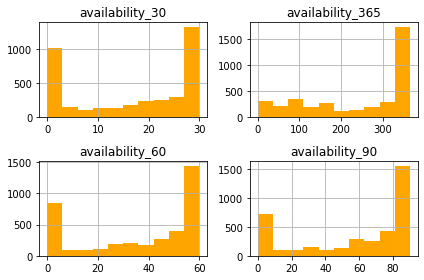

In [20]:
listings_availability =  listings_clean.loc[ :, ['availability_30', 'availability_60', 
                                                 'availability_90', 'availability_365']]
# Plot the distribution of all availability info
listings_availability.hist(color = 'orange')
plt.tight_layout()

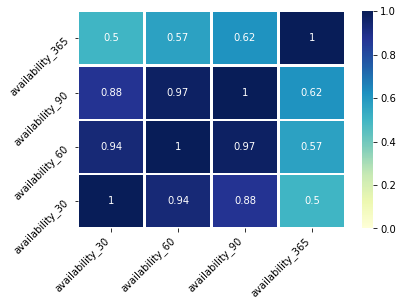

In [21]:
plt.rcParams["figure.figsize"] = [6,4]
corr = listings_availability.corr()
ax = sns.heatmap(corr, cmap="YlGnBu",annot = True, vmin=0, vmax=1, center=0.5, linewidth=1.5)
ax.set_xticklabels( ax.get_xticklabels(), rotation=45, horizontalalignment='right')
ax.set_yticklabels( ax.get_yticklabels(), rotation=45, horizontalalignment='right') 
ax.set_ylim(0,4)
plt.show()

All the availablility features show the similiar pattern, also they are highly correlated.

In [22]:
availability_drop = ['availability_30', 'availability_60', 'availability_365']
for feat in listings_clean.columns:
    if feat in availability_drop:
        listings_clean = drop(listings_clean, feat)

Dropping availability_30...
Dropping availability_60...
Dropping availability_365...


`hosts-related info`

In [23]:
listings_host = pd.DataFrame()
for feat in listings_clean.columns:
    if 'host' in feat:              
        listings_host[feat] = listings_clean[feat]

In [24]:
listings_host.head()

,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_has_profile_pic,host_identity_verified,calculated_host_listings_count
0,956883,2011-08-11,"Seattle, Washington, United States",within a few hours,96%,100%,f,Queen Anne,t,t,2
1,5177328,2013-02-21,"Seattle, Washington, United States",within an hour,98%,100%,t,Queen Anne,t,t,6
2,16708587,2014-06-12,"Seattle, Washington, United States",within a few hours,67%,100%,f,Queen Anne,t,t,2
3,9851441,2013-11-06,"Seattle, Washington, United States",NaN,NaN,NaN,f,Queen Anne,t,t,1
4,1452570,2011-11-29,"Seattle, Washington, United States",within an hour,100%,NaN,f,Queen Anne,t,t,1


In [25]:
#We spot some features with redundancy 
listings_host_location = ["host_location", "host_neighbourhood", "neighbourhood_group_cleansed"]
for feat in listings_clean.columns:
    if feat in listings_host_location:
        print('Level of ' + feat + ' :', len(listings_clean[feat].value_counts()), '\n',   
              listings_clean[feat].value_counts(), '\n' )

Level of host_location : 120 
 Seattle, Washington, United States        3259
US                                         246
Spokane, Washington, United States          41
Kent, Washington, United States             34
Los Angeles, California, United States      13
                                          ... 
Toronto, Ontario, Canada                     1
Hilo, Hawaii, United States                  1
Addison, Texas, United States                1
Dallas, Texas, United States                 1
Lafayette, California, United States         1
Name: host_location, Length: 120, dtype: int64 

Level of host_neighbourhood : 102 
 Capitol Hill       405
Belltown           254
Ballard            210
Minor              191
Queen Anne         189
                  ... 
Long Beach           1
North Hollywood      1
Beverly Hills        1
Kauaʻi               1
Manhattan Beach      1
Name: host_neighbourhood, Length: 102, dtype: int64 

Level of neighbourhood_group_cleansed : 17 
 Other neighborh

- The `host_location` contains too many categories: 120 distinct locations. Besides, the data quality is problematic --- it contains some info outside Seattle, such as Los Angeles, California, Minneapolis, Minnesota and etc., we will drop it.
- Also, we still stick to the feature `neighbourhood_group_cleansed`, with 17 distinct levels, instead of the `host_neighbourhood ` whereas it is 102 category, though they are both features for the same location information.

In [26]:
#Drop features
host_drop = ["host_location", "host_neighbourhood"]
for feat in listings_clean.columns:
    if feat in host_drop:
        listings_clean = drop(listings_clean, feat)

Dropping host_location...
Dropping host_neighbourhood...


In [27]:
# There are some factors we need to check
for feat in listings_clean.columns:
    if feat in ['host_response_time', 'room_type', 'property_type', 'bed_type','calendar_updated', 'cancellation_policy']:
        print('Level of ' + feat + ' :', len(listings_clean[feat].value_counts()), '\n',   
              listings_clean[feat].value_counts(), '\n' )

Level of host_response_time : 4 
 within an hour        1692
within a few hours     968
within a day           597
a few days or more      38
Name: host_response_time, dtype: int64 

Level of property_type : 16 
 House              1733
Apartment          1708
Townhouse           118
Condominium          91
Loft                 40
Bed & Breakfast      37
Other                22
Cabin                21
Bungalow             13
Camper/RV            13
Boat                  8
Tent                  5
Treehouse             3
Chalet                2
Dorm                  2
Yurt                  1
Name: property_type, dtype: int64 

Level of room_type : 3 
 Entire home/apt    2541
Private room       1160
Shared room         117
Name: room_type, dtype: int64 

Level of bed_type : 5 
 Real Bed         3657
Futon              74
Pull-out Sofa      47
Airbed             27
Couch              13
Name: bed_type, dtype: int64 

Level of calendar_updated : 34 
 today            706
2 weeks ago      34

 We will drop the feature `calendar_updated` due to to many categories.

In [28]:
listings_clean = drop(listings_clean, "calendar_updated")

Dropping calendar_updated...


In [29]:
#Last step, drop the featurs with missingness over 50% if there's any
for feat in listings_clean.columns:
    if listings_clean[feat].isnull().sum()/len(listings_clean.index) > 0.5:
        listings_clean = drop(listings_clean, feat)

Dropping square_feet...


### 2.3 Re-code the Features
<a id="Recoding"></a>

In [30]:
# for each kind of features, we create list respectively

# time features
time = ['host_since', 'first_review', 'last_review']

# categorical feature
categoricals = ['host_response_time', 'neighbourhood_group_cleansed', 'property_type', 
                'room_type', 'bed_type', 'cancellation_policy']
# price features
price = ['price', 'cleaning_fee', 'extra_people']    

# continuous features
continuous = ['host_response_rate', 'host_acceptance_rate']

# Boolean features
boolean = ['host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', 
           'is_location_exact', 'instant_bookable', 'require_guest_profile_picture', 
           'require_guest_phone_verification']

In [31]:
# Convert the objects into corresponding category
for feat in listings_clean.columns:
    if feat in time:
        listings_clean[feat] = pd.to_datetime(listings_clean[feat], format='%Y/%m/%d')
    if feat in categoricals:
        listings_clean[feat] = listings_clean[feat].astype('category')
    if feat in price:
        listings_clean[feat] = listings_clean[feat].str.lstrip('$,').str.replace(',', '').astype('float')
    if feat in continuous:
        listings_clean[feat] = listings_clean[feat].str.rstrip('%').astype('float')/100        
    if feat in boolean:
        listings_clean[feat] = listings_clean[feat].map(lambda available: 1 if available == 't' else 0).astype('float')   

Now we have a relatively cleaned dataset with 44 features. Before doing re-coding, let's dive into the data for some features that need to pay attention to.
<br>
Let's plot the missing pattern for all current features for now.

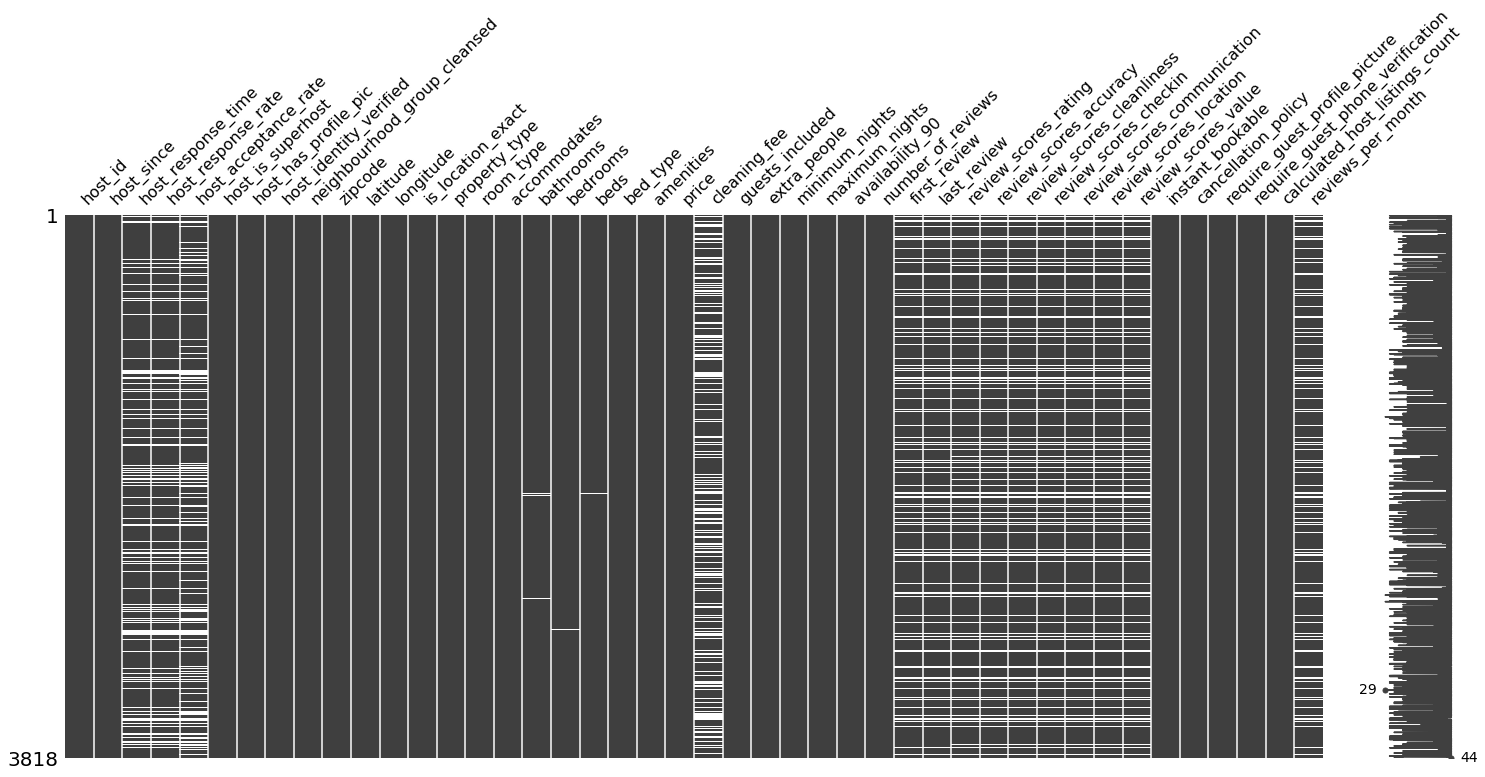

In [32]:
# Missing pattern plot
msno.matrix(listings_clean)
plt.show()

It's very obvious that the time `host_since`, `host_response_rate` and `host_acceptance_rate` have the highly similar pattern, and also for all review features: `first_review`, `last_review`, all the review scores and `reviews_per_month`, their missingness are all with the same observations. Let's pull the data to find more. 

In [33]:
listings_clean.iloc[:,[2,3,4,22,28,29,30,31,32,33,34,35,36,37,43]].head(20)

,host_response_time,host_response_rate,host_acceptance_rate,cleaning_fee,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
0,within a few hours,0.96,1.0,NaN,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,4.07
1,within an hour,0.98,1.0,40.0,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,1.48
2,within a few hours,0.67,1.0,300.0,20,2014-07-30,2015-09-03,97.0,10.0,10.0,10.0,10.0,10.0,10.0,1.15
3,NaN,NaN,NaN,NaN,0,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,within an hour,1.00,NaN,125.0,38,2012-07-10,2015-10-24,92.0,9.0,9.0,10.0,10.0,9.0,9.0,0.89
5,NaN,NaN,NaN,40.0,17,2015-06-11,2015-09-28,95.0,10.0,10.0,10.0,10.0,10.0,10.0,2.45
6,within an hour,1.00,1.0,NaN,58,2014-01-27,2015-12-07,99.0,10.0,10.0,10.0,10.0,10.0,10.0,2.46
7,within an hour,1.00,1.0,25.0,173,2013-01-03,2016-01-01,97.0,10.0,10.0,10.0,10.0,9.0,10.0,4.73
8,NaN,NaN,1.0,NaN,8,2015-06-22,2015-08-17,97.0,10.0,9.0,10.0,9.0,10.0,10.0,1.22
9,within an hour,0.98,1.0,40.0,32,2014-04-27,2015-12-20,97.0,10.0,10.0,10.0,10.0,10.0,9.0,1.55


Why they are missing?
- We spot that if a record has numbers of review as 0, all the review related features are missing, which make sense, those all can be good metrics to showing how many customer booked/preferred the listings.
- For the host response/acceptance feature, besides the review number is 0, they also have some other cases are missing, this can indicates that the host's status of active or not.

In [34]:
summarize_missing(listings_clean.iloc[:,[2,3,4,22,28,29,30,31,32,33,34,35,36,37,43]])

,No. Missing,Perct. Missing
host_response_time,523,13.70%
host_response_rate,523,13.70%
host_acceptance_rate,773,20.25%
cleaning_fee,1030,26.98%
number_of_reviews,0,0.00%
first_review,627,16.42%
last_review,627,16.42%
review_scores_rating,647,16.95%
review_scores_accuracy,658,17.23%
review_scores_cleanliness,653,17.10%


What do we do about those missing records?
<br>
This features should be treated carefully, we don't want to drop them or imputed as mode or median because these records could be indicating the inactive listings - these listings are legitimate properties and either have their calendars closed or have an unacceptably high price in their areas. The reason we want to keep those listing is that they are legitimate properties with advertised prices. When considering the yield of a listing, they should be considered since other related information of those listed may reveal why these properties are not favorable among the customers, therefore they have low yields.
<br>
Hence in the data management step down below, we will encode the related missing values as `no review` and `unknown`, to including all the info reflect the info from the data.

`first_review` & `last_review`
- we will calculate the length of the listing start on the platform to the first review, it could be a measurement of the attraction of the listing, the shorter indicates the better potential attraction.
- similarly, the `last_review` will be used to calculated as the length from the time point of the last review to the data was scraped, which can indicate the sustainability of the listing - the short indicates they have better sustainability, they can keep the customer staying.

In [35]:
# Define the regroup function
def regroup(df, col, bins, labels, na_label='nan'):
    df[col] = pd.cut(df[col], bins=bins, labels=labels, include_lowest=True)
    df[col] = df[col].astype('str')
    df[col].replace('nan', 'no reviews', inplace=True)

In [36]:
#Calculate time interval
listings_clean['first_review_since_host'] = (listings_clean.first_review -
                                             listings_clean.host_since).astype('timedelta64[D]') 
listings_clean['last_review_month'] = (datetime(2016, 1, 4) 
                                       - listings_clean.last_review).astype('timedelta64[D]')


# regroup the calculated time interval
# regroup the time to active first review
regroup(listings_clean,
        'first_review_since_host',
        bins=[0, 182, 365, 730, 1460, max(listings_clean.first_review_since_host)],
        labels=['0-6 months', '6-12 months', '1-2 years', '2-3 years','4+ years']  )

# regroup time since last review
regroup(listings_clean,
        'last_review_month',
        bins=[0, 14, 60, 182, 365, max(listings_clean.last_review_month)],
        labels=['0-2 weeks', '2-8 weeks', '2-6 months', '6-12 months', '1+ year'] )

listings_clean['first_review_since_host']= listings_clean['first_review_since_host'].astype('category')
listings_clean['last_review_month']= listings_clean['last_review_month'].astype('category')

# Post heck the results  
print('Active time since host for listings %:\n',
      listings_clean['first_review_since_host'].value_counts(normalize=True))

print('Time since last reviews %:\n',
      listings_clean['last_review_month'].value_counts(normalize=True))

Active time since host for listings %:
 0-6 months     0.324515
1-2 years      0.176794
2-3 years      0.168675
no reviews     0.166056
6-12 months    0.119696
4+ years       0.044264
Name: first_review_since_host, dtype: float64
Time since last reviews %:
 2-6 months     0.287585
2-8 weeks      0.286014
0-2 weeks      0.207700
no reviews     0.164222
6-12 months    0.032740
1+ year        0.021739
Name: last_review_month, dtype: float64


`Review ratings columns`
<br>
There is a group of features describing the review rating from a different perspective. The most rating are around the 7-10, we will regroup them into a new category, and keep the missing value as 'unknown'.

In [37]:
# Check all the review related features together

# Creat a sub dataset for review rating
listings_review_rating = pd.DataFrame()
for feat in listings_clean.columns:
    if 'review_scores' in feat:              
        listings_review_rating[feat] = listings_clean[feat]
        
listings_review_rating.head()

,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
0,95.0,10.0,10.0,10.0,10.0,9.0,10.0
1,96.0,10.0,10.0,10.0,10.0,10.0,10.0
2,97.0,10.0,10.0,10.0,10.0,10.0,10.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,92.0,9.0,9.0,10.0,10.0,9.0,9.0


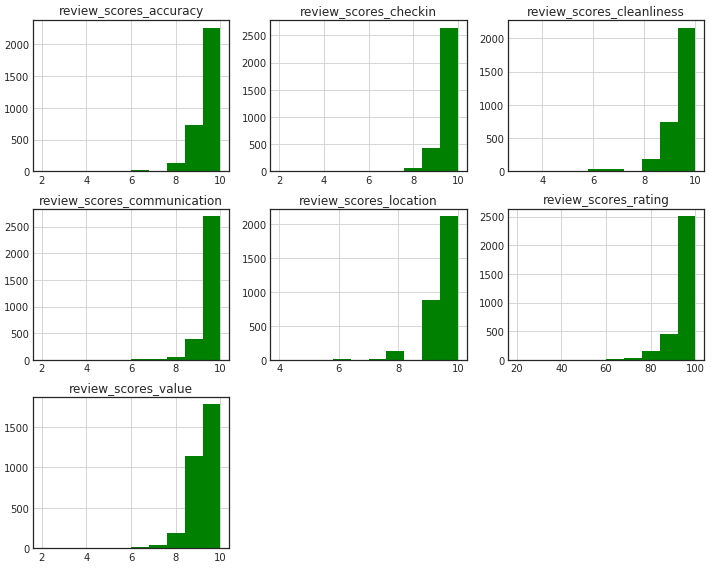

In [38]:
# Plot the distribution
with plt.style.context("seaborn-white"):
    plt.rcParams["figure.figsize"] = [10,8]
    listings_review_rating.hist(bins=10, color = 'green')
    plt.tight_layout()

In [39]:
# get a list for all review related features
review_score = ['review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 
                'review_scores_communication', 'review_scores_location', 'review_scores_value']

# regroup columns scored out of 10
for col in review_score:
    regroup(listings_clean,
            col,
            bins=[0, 8, 9, 10],
            labels=['0-8/10', '9/10', '10/10'],
            na_label='no reviews')

# regroup column scored out of 100
regroup(listings_clean,
        'review_scores_rating',
        bins=[0, 80, 95, 100],
        labels=['0-79/100', '80-94/100', '95-100/100'],
        na_label='no reviews')

# Convert to rigth category
for feat in listings_clean.columns:
    if feat in review_score:
        listings_clean[feat] = listings_clean[feat].astype('category')
        
listings_clean['review_scores_rating'] = listings_clean['review_scores_rating'].astype('category')

# Spot check one features
print('Review score Rating %:\n', 
      listings_clean.review_scores_rating.value_counts(normalize=True))

Review score Rating %:
 95-100/100    0.461760
80-94/100     0.321372
no reviews    0.169460
0-79/100      0.047407
Name: review_scores_rating, dtype: float64


`host_response_time`, `host_response_rate` & `host_acceptance_rate`
<br>we will regroup the missing part as 'unknown'.

`host_response_rate`

In [40]:
# regroup into four groups
listings_clean.host_response_rate = pd.cut(listings_clean.host_response_rate, 
                                           bins=[0, 0.5, 0.9, 0.99, 1], 
                                           labels=['0-49%', '50-89%', '90-99%', '100%'], include_lowest=True)

# Converting to string
listings_clean.host_response_rate = listings_clean.host_response_rate.astype('str')

# Replace nulls with 'unknown'
listings_clean.host_response_rate.replace('nan', 'unknown', inplace=True)
listings_clean['host_response_rate']= listings_clean['host_response_rate'].astype('category')

# counts summary
listings_clean.host_response_rate.value_counts(normalize=True)

100%       0.621006
50-89%     0.152960
unknown    0.136983
90-99%     0.065479
0-49%      0.023573
Name: host_response_rate, dtype: float64

`host_response_time`

In [41]:
listings_clean.host_response_time = listings_clean.host_response_time.cat.add_categories('unknown')
listings_clean.host_response_time.fillna("unknown", inplace=True)
listings_clean.host_response_time.value_counts(normalize=True)

within an hour        0.443164
within a few hours    0.253536
within a day          0.156365
unknown               0.136983
a few days or more    0.009953
Name: host_response_time, dtype: float64

`host_acceptance_rate`
<br> we drop the feature since most of the acceptance rate are 1.

In [42]:
listings_clean.host_acceptance_rate.value_counts(normalize=True)

1.0    0.999672
0.0    0.000328
Name: host_acceptance_rate, dtype: float64

In [43]:
listings_clean.drop('host_acceptance_rate', axis=1, inplace=True)

`reviews_per_month` & `number_of_reviews`
<br>As we've examined, the missing value of `reviews_per_month` is indicated no review, so we will regroup them all as 0. Also, we will drop `number_of_reviews`, which contributes to the calculation of `reviews_per_month`.

In [44]:
# Replace nulls with 0
listings_clean.reviews_per_month.fillna(0, inplace=True)

# drop feature
listings_clean.drop('number_of_reviews', axis=1, inplace=True)

# run simple stats
listings_clean.reviews_per_month.describe()

count    3818.000000
mean        1.737514
std         1.835425
min         0.000000
25%         0.310000
50%         1.105000
75%         2.660000
max        12.150000
Name: reviews_per_month, dtype: float64

`host_since`
<br> we will convert `host_since` into a measure of the number of days that a host has been active on the platform, starting from the date that the data was scraped (2016-01-04).

In [45]:
from datetime import datetime
# Calculating the number of days
listings_clean['host_active_days'] = (datetime(2016, 1, 4) - listings_clean.host_since).astype('timedelta64[D]')

# Printing mean and median
print("Mean days as host:", round(listings_clean['host_active_days'].mean(),0))
print("Median days as host:", listings_clean['host_active_days'].median())

Mean days as host: 837.0
Median days as host: 752.5


`amenities`

In [46]:
# review original data
listings_clean['amenities'].head()

0    {TV,"Cable TV",Internet,"Wireless Internet","A...
1    {TV,Internet,"Wireless Internet",Kitchen,"Free...
2    {TV,"Cable TV",Internet,"Wireless Internet","A...
3    {Internet,"Wireless Internet",Kitchen,"Indoor ...
4    {TV,"Cable TV",Internet,"Wireless Internet",Ki...
Name: amenities, dtype: object

In [47]:
# Extract the element from the amenities
amenities_list = list(listings_clean.amenities)
amenities_list_string = "".join(amenities_list)
amenities_list_string = amenities_list_string.replace('{', '')
amenities_list_string = amenities_list_string.replace('}', ',')
amenities_list_string = amenities_list_string.replace('"', '')

# Create a list to included all the amenities has showed up in entry 
amenities_set = [x.strip() for x in amenities_list_string.split(',')]

from collections import Counter

#Create a dictionary for all the amenities with their counts
counter_amenities = Counter(amenities_set)
amenities_df = pd.DataFrame.from_dict(counter_amenities, orient='index').reset_index()

# Get top 30 amenities
amenities_df.columns = ['amenities', 'count']
amenities_df = amenities_df.sort_values(by='count', ascending=False)
amenities_df_top_30 = amenities_df.nlargest(30, 'count')
amenities_df_top_30

,amenities,count
3,Wireless Internet,3667
6,Heating,3627
5,Kitchen,3423
12,Smoke Detector,3281
17,Essentials,3237
9,Dryer,2997
8,Washer,2992
2,Internet,2811
24,Shampoo,2670
0,TV,2574


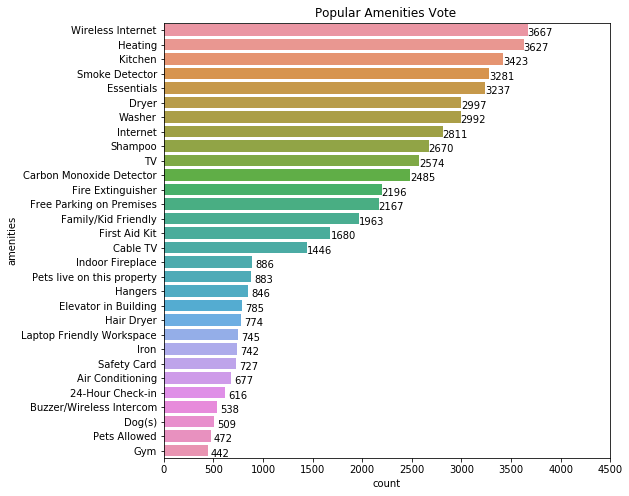

In [48]:
# Visualize the Amenities by counts
plt.rcParams["figure.figsize"] = [8,8]
## Create plot
splot = sns.barplot(x="count", y="amenities", data=amenities_df_top_30)
## Adding text
for p in splot.patches:
    width = p.get_width()
    splot.text(width + 127  ,
            p.get_y()+p.get_height()/2. + 0.4,
            '{:1.0f}'.format(width),
            ha="center")
## Adding title
splot.set_title("Popular Amenities Vote ")  

plt.xlim(0,4500)
plt.show()

In [50]:
# Access the top 30 popular amenities
amenities_top_30_list= list(amenities_df_top_30['amenities'])

# Add dummy features for amenities
for feat in amenities_top_30_list:
    listings_clean.loc[listings_clean['amenities'].str.contains(feat), feat] = 1
    
# Replacing nulls with zeros for new columns
cols_to_replace_nulls = listings_clean.iloc[:,45:].columns
listings_clean[cols_to_replace_nulls] = listings_clean[cols_to_replace_nulls].fillna(0)

In [51]:
# Produces a list of amenity features where one category (true or false) contains fewer than 10% of listings
infrequent_amenities = []
for col in listings_clean.iloc[:,45:].columns:
    if listings_clean[col].sum() < len(listings_clean)/10:
        infrequent_amenities.append(col)
print(infrequent_amenities)

# Dropping infrequent amenity features
listings_clean.drop(infrequent_amenities, axis=1, inplace=True)

# Dropping the original amenity feature
listings_clean.drop('amenities', axis=1, inplace=True)

['Dog(s)']


`property_type`
<br> recode it as less categories.

In [52]:
listings_clean.property_type.value_counts()

House              1733
Apartment          1708
Townhouse           118
Condominium          91
Loft                 40
Bed & Breakfast      37
Other                22
Cabin                21
Camper/RV            13
Bungalow             13
Boat                  8
Tent                  5
Treehouse             3
Dorm                  2
Chalet                2
Yurt                  1
Name: property_type, dtype: int64

In [53]:
# Replacing categories that are types of houses or apartments
listings_clean.property_type.replace({'Townhouse': 'House', 'Condominium': 'Apartment','Loft': 'Apartment', 
                                      'Bungalow': 'House', 'Chalet': 'House' }, 
                                     inplace=True)

# Replacing other categories with 'other'
listings_clean.loc[~listings_clean.property_type.isin(['House', 'Apartment']), 'property_type'] = 'Other'

listings_clean['property_type']= listings_clean['property_type'].astype('category')

# Post check the new regroupped data
listings_clean.property_type.value_counts()

House        1866
Apartment    1839
Other         113
Name: property_type, dtype: int64

`bed_type`
<br>Basically all the bed are read bed, we drop this feature.

In [54]:
# Show category with percentage
print("bed type %: \n", listings_clean.bed_type.value_counts(normalize=True))

# Drop the features
listings_clean.drop('bed_type', axis=1, inplace=True)

bed type %: 
 Real Bed         0.957831
Futon            0.019382
Pull-out Sofa    0.012310
Airbed           0.007072
Couch            0.003405
Name: bed_type, dtype: float64


`cancellation_policy`

In [55]:
# Check cancellation_policy - looks good
listings_clean.cancellation_policy.value_counts()

strict      1417
moderate    1251
flexible    1150
Name: cancellation_policy, dtype: int64

### 2.4 Deal with Missingness
<a id = "Missing"></a>

In [56]:
# Check the feauture with missing values of current data
pre_summary = summarize_missing(listings_clean)
pre_summary[pre_summary['No. Missing']>0]

,No. Missing,Perct. Missing
host_since,2,0.05%
zipcode,7,0.18%
bathrooms,16,0.42%
bedrooms,6,0.16%
beds,1,0.03%
cleaning_fee,1030,26.98%
first_review,627,16.42%
last_review,627,16.42%
host_active_days,2,0.05%


The reports shows the features left for imputation after the previous step,
<br>
As mentioned before, the `host_since`, `zipcode`, `first_review`, `last_review` will be used for EDA and dropped later. For now, let's take a look into `bathrooms`, `bedrooms`, `beds`, `cleaning_fee` and `host_active_days`.

 `bathrooms`

In [57]:
print("Description for Bathrooms:\n", listings_clean.bathrooms.describe())
print("Median for Bathrooms:", listings_clean.bathrooms.median())

Description for Bathrooms:
 count    3802.000000
mean        1.259469
std         0.590369
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         8.000000
Name: bathrooms, dtype: float64
Median for Bathrooms: 1.0


In [58]:
# fill missing value with median
listings_clean.bathrooms.fillna(listings_clean.bathrooms.median(), inplace=True)

`bedrooms`

In [59]:
print("Description for Bedrooms:\n", listings_clean.bedrooms.describe())
print("Median for bedrooms: " ,listings_clean.bedrooms.median())

Description for Bedrooms:
 count    3812.000000
mean        1.307712
std         0.883395
min         0.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         7.000000
Name: bedrooms, dtype: float64
Median for bedrooms:  1.0


In [60]:
# fill missing value with median
listings_clean.bedrooms.fillna(listings_clean.bedrooms.median(), inplace=True)

`beds`

In [61]:
print("Description for beds:\n", listings_clean.beds.describe())
print("Median for beds:", listings_clean.beds.median())

Description for beds:
 count    3817.000000
mean        1.735394
std         1.139480
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        15.000000
Name: beds, dtype: float64
Median for beds: 1.0


In [62]:
# fill missing value with median
listings_clean.beds.fillna(listings_clean.beds.median(), inplace=True)

`cleaning_fee` 
<br> The same way as we did to review related features. 

In [63]:
listings_clean.cleaning_fee.fillna(0, inplace=True)

`host_active_days`

In [64]:
listings_clean.host_active_days.fillna(listings_clean.host_active_days.median(), inplace=True)

In [65]:
# Post check after imputation
aft_summary = summarize_missing(listings_clean)
aft_summary[pre_summary['No. Missing']>0]

,No. Missing,Perct. Missing
host_since,2,0.05%
zipcode,7,0.18%
bathrooms,0,0.00%
bedrooms,0,0.00%
beds,0,0.00%
cleaning_fee,0,0.00%
first_review,627,16.42%
last_review,627,16.42%
host_active_days,0,0.00%


###  2.5 Define 'Yield'
<a id ="Yd"></a>
To proceed forward, we introduce the concept of yield is used as a proxy for earnings. Yield is defined as the amount of revenue that a property will earn over a given time period. The calculation of yield uses Inside Airbnb’s ‘San Francisco Model’ (http://insideairbnb.com/about.html) based on price, average length of stay and review rate:
<br/><br/>
Average length of stay * Price * No. of reviews/month * Review Rate
<br/><br/>
And the average length of stay and review are pre-determined by the official data.
<br/><br/>
Similarly in our data, we will define a concept of monthly yield - `Yield`. However, we will do it in a more straightforward way:
<br/><br/>
__Minimum_nights * Price * Reviews_per_month__
<br/><br/>
This created features `Yield` is the estimated monthly earning for each listing, though we believe that a listing should earn more since not every guest booked the place will leave a review. This `Yield` is a proximate value on how much earning a listing can earn in a month, this also an indicator of health for actively managed listings.

In [66]:
listings_clean['yield'] = listings_clean.minimum_nights *listings_clean.price*listings_clean.reviews_per_month

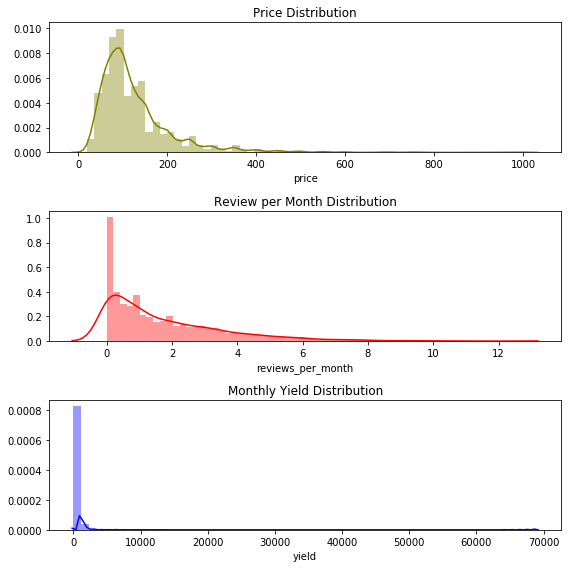

In [67]:
# plot
f, axes = plt.subplots(3, 1, figsize=(8, 8), sharex=False)
sns.distplot(listings_clean['price'], kde=True, bins= 60, color="olive", ax=axes[0]).set_title("Price Distribution")
sns.distplot(listings_clean['reviews_per_month'], kde=True, bins= 60, color="red", ax=axes[1]).set_title("Review per Month Distribution")
sns.distplot(listings_clean['yield'], kde=True, bins= 60, color="blue", ax=axes[2]).set_title("Monthly Yield Distribution")
plt.tight_layout()
plt.show()


In [68]:
print('Description Details: \n',
      listings_clean.loc[:,['price', 'reviews_per_month','yield' ]].describe())

print('Median Value for price, review_per_month and annual yield: \n', 
      listings_clean.loc[:,['price', 'reviews_per_month','yield']].median())

Description Details: 
              price  reviews_per_month         yield
count  3818.000000        3818.000000   3818.000000
mean    127.976166           1.737514    385.975039
std      90.250022           1.835425   1367.896512
min      20.000000           0.000000      0.000000
25%      75.000000           0.310000     57.000000
50%     100.000000           1.105000    205.925000
75%     150.000000           2.660000    469.650000
max    1000.000000          12.150000  69000.000000
Median Value for price, review_per_month and annual yield: 
 price                100.000
reviews_per_month      1.105
yield                205.925
dtype: float64


__Summary__
<br>
We visualize the distributions for price, reviews, and the resulting Annual yield above, the bulk of listings in Seattle are above \\$100/night and receive 0–2 bookings a month. Earning of Airbnb average host \\$385 per listing in a month. we saw some listing make no earning at all and some make a considerable amount of income. Putting those numbers into perspective, greater yield indicating a healthy premium for actively managed listings.

## 3. Exploratory Data Analysis
<a id="EDA"></a> 
<br> For this section, we will peform the explore the data on the features that we are most interested in.

### Time Related Features

__Global Trend for Host__

Let's take a look at the global market for the host. The data shows from the year 2009 to 2016, there are increasing trend for both the hosts joining Airbnb and listing getting their first review over these years, and there is a small boost around 2015-2016 - that may be caused by business event or campaign, or the tourism trend of local Seattle, and it also might be Airbnb gain its popularity, and guest are more willing to engaged to review the place they've stayed.
<br>
We definitely see a zig-zag trend for both curves, showing a mix of seasonality and event effect.

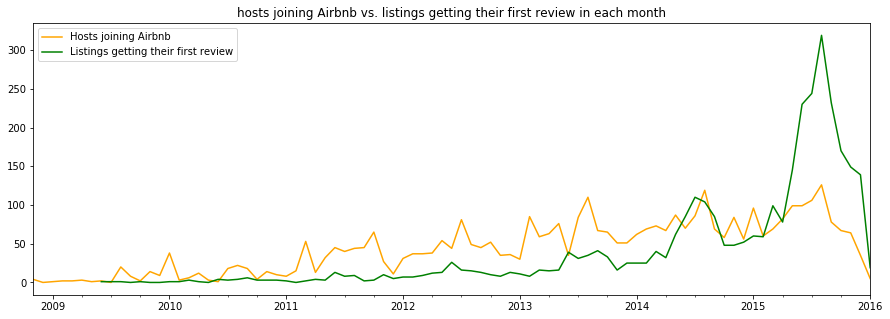

In [69]:
plt.figure(figsize=(15,5))
listings_clean.set_index('host_since').resample('MS').size().plot(label='Hosts joining Airbnb', color='orange')
listings_clean.set_index('first_review').resample('MS').size().plot(label='Listings getting their first review', color='green')
plt.title('hosts joining Airbnb vs. listings getting their first review in each month')
plt.legend()
plt.xlim('2008-11-01', '2016-01-10') # Limiting to minimum and maximum study window
plt.xlabel('')
plt.ylabel('')
plt.show()

__Global Trend for Yield, price, review_per_month__
We smooth out the noise by getting the resampling median for `yield`, `price` and `review_per_month`. We still can see there are seasonality among these features, however, the median value does not show remarkable increasing over these years. For `review_per_month`, we have the extra plot to zoom in to see the variation more closely.

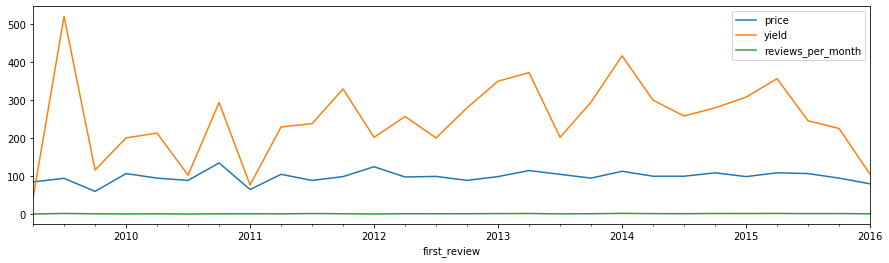

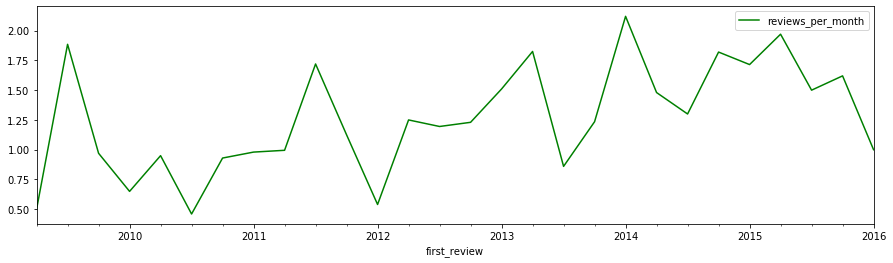

In [70]:
# Get target features
dt_first_review = listings_clean.loc[:,['first_review','price', 'reviews_per_month','yield'] ].copy()
# Drop null of index
dt_first_review = dt_first_review[dt_first_review.first_review.notnull()]   
# set index
dt_first_review.set_index(dt_first_review.first_review, inplace = True)
# Data to plot
dt_yield = pd.DataFrame(dt_first_review[['yield', 'price', 'reviews_per_month']])
# Plot Resamplimg data
dt_yield[['price','yield', 'reviews_per_month']].resample("Q").median().plot(subplots=False, figsize=(15,4))
dt_yield[['reviews_per_month']].resample("Q").median().plot(subplots=False, figsize=(15,4), color = 'green')
plt.show()

__first_review_since_host & last_review_month__
Remember that we have two calculated feature `first_review_since_host` and `last_review_month` - which indicates the ability to attract the customer and the survival ability to the latest time point.  
<br>
It seems that the attract of the customer quickly does not contribute to the yield much - four groups have a similar average yield whereas the 0-6 month group does have a slightly higher yield. 
And for the survival ability - Yes, it have a very obvious impact, staying at the platform as much as you can, it'll help to get the higher yield.

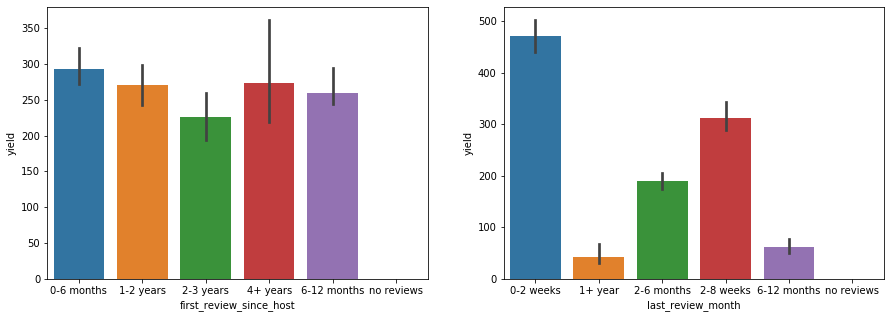

In [81]:
from numpy import median
f, axes = plt.subplots(1, 2, figsize=(15,5))
sns.barplot(x="first_review_since_host", y="yield", data=listings_clean, estimator=median,ax=axes[0])
sns.barplot(x="last_review_month", y="yield", data=listings_clean, estimator=median, ax=axes[1])
plt.show()

### Numerical Features

__calculated_host_listings_count__
We aggregate the data at the `calculated_host_listings_count` level to see if listings count affects the average - 10 counts of hosting listing gains the highest average yield whereas the 11 counts gains the least. Additionally, it looks like range from 1-12 have the relatively better revenue than those have more listing in range 21-37.

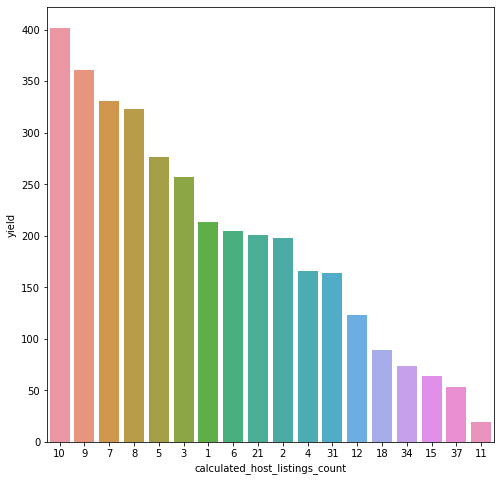

In [71]:
#group by host listing count
listings_count_yeild = listings_clean.groupby(["calculated_host_listings_count"])['yield'].aggregate(np.median).reset_index().sort_values('yield',ascending = False)
sns.barplot(x='calculated_host_listings_count', y='yield', data=listings_count_yeild, order=listings_count_yeild['calculated_host_listings_count'])  
plt.show()    

In [72]:
print(listings_count_yeild)

    calculated_host_listings_count    yield
9                               10  402.000
8                                9  361.080
6                                7  330.820
7                                8  323.100
4                                5  276.450
2                                3  257.190
0                                1  213.750
5                                6  204.750
14                              21  200.850
1                                2  198.240
3                                4  165.585
15                              31  163.950
11                              12  122.830
13                              18   89.360
16                              34   74.100
12                              15   64.000
17                              37   52.800
10                              11   19.145


__Yield and Price__
<br>
we all know our yield is calculated by price, but let's take a closer look - when we limited the yield our data with 800, where is the majority observation concentrate at (87%, 3336/3818). Clearly lower price is acceptable, easier to make more income - however, with the range of \$\200 per night, there also variations - indicating the other influential factors.

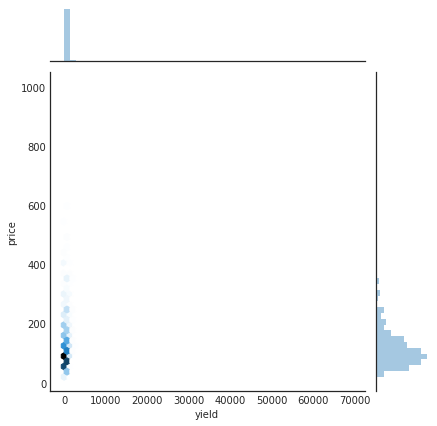

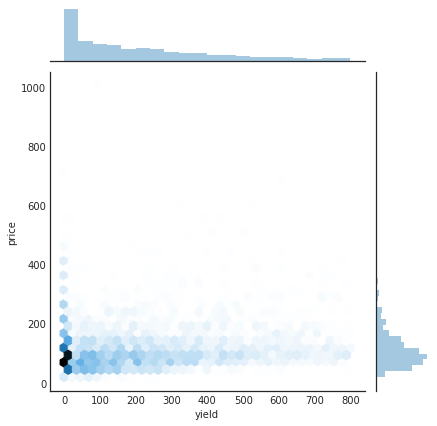

In [73]:
price_yield = listings_clean[listings_clean['yield']<800].loc[:,['yield','price']]

with plt.style.context("seaborn-white"):
    sns.jointplot(x=listings_clean['yield'], y=listings_clean['price'], kind="hex");
    sns.jointplot(x=price_yield['yield'], y=price_yield['price'], kind="hex");

In [74]:
listings_clean.host_active_days 

0       1607.0
1       1047.0
2        571.0
3        789.0
4       1497.0
         ...  
3813     266.0
3814      82.0
3815       5.0
3816     366.0
3817     619.0
Name: host_active_days, Length: 3818, dtype: float64

__host_active_days__
`host_active_days` is a measurement of how long the listing has been active staying at the platform. Grandly, the time trend seems to have no specific effect on the earning - however, we do see as the time interval increase, there is a tendency that fewer hosts can stay that long - maybe these properties are targeting the short-term marketing. Also, a closer investigation indicates that the host has the performance of the acceptable price with medium yield. 

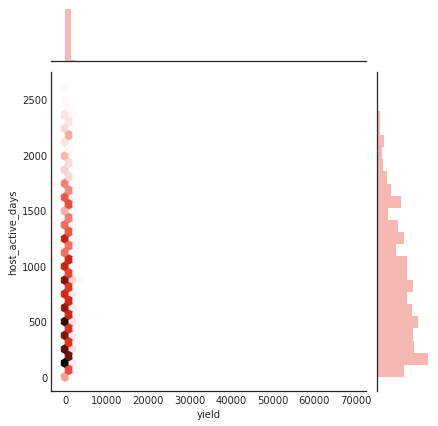

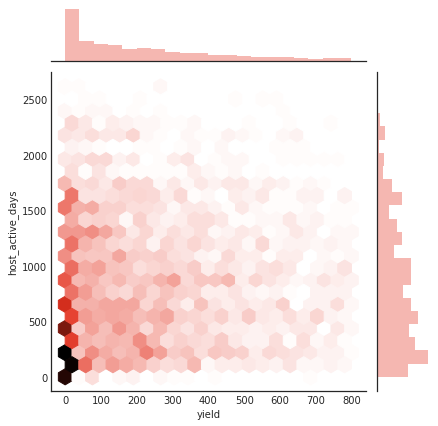

In [75]:
active_yield = listings_clean[listings_clean['yield']<800].loc[:,['yield','host_active_days']]
with plt.style.context("seaborn-white"):
    sns.jointplot(x=listings_clean['yield'], y=listings_clean['host_active_days'], kind="hex",color="#e74c3c")
    sns.jointplot(x=active_yield['yield'], y=active_yield['host_active_days'], kind="hex",color="#e74c3c");

### Categorical Features

__Review Score__
unsurprisingly, all the review score shows the pattern that - higher rating, higher yield.

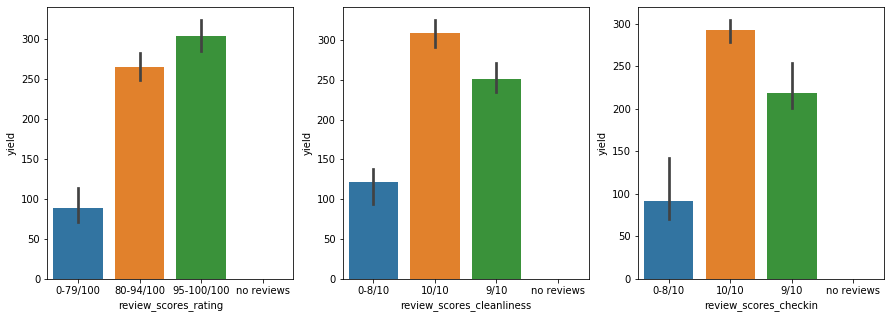

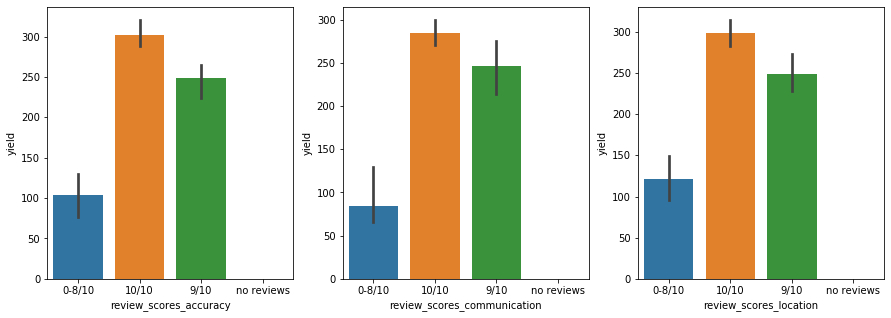

In [77]:
f, axes = plt.subplots(1, 3, figsize=(15,5))
sns.barplot(x= 'review_scores_rating', y="yield", data=listings_clean, estimator=median, ax=axes[0])
sns.barplot(x= 'review_scores_cleanliness', y="yield", data=listings_clean, estimator=median, ax= axes[1])
sns.barplot(x= 'review_scores_checkin', y="yield", data=listings_clean, estimator=median, ax= axes[2])
plt.show()

f, axes = plt.subplots(1, 3, figsize=(15,5))
sns.barplot(x= 'review_scores_accuracy', y="yield", data=listings_clean, estimator=median, ax=axes[0])
sns.barplot(x= 'review_scores_communication', y="yield", data=listings_clean, estimator=median, ax= axes[1])
sns.barplot(x= 'review_scores_location', y="yield", data=listings_clean, estimator=median, ax= axes[2])
plt.show()


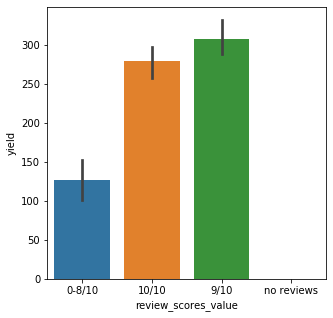

In [78]:
f, axes = plt.subplots(1, 1, figsize=(5,5))
sns.barplot(x= 'review_scores_value', y="yield", data=listings_clean, estimator=median)
plt.show()

__Amenities__

In [130]:
def binary_count_and_price_plot(col, figsize=(8,3)):
    """
    Plots a simple bar chart of the counts of true and false categories in the column specified,
    next to a bar chart of the median price for each category.
    A figure size can optionally be specified.
    """
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=figsize)
    fig.suptitle(col, fontsize=16, y=1)
    plt.subplots_adjust(top=0.80) # So that the suptitle does not overlap with the ax plot titles
    
    listings_clean.groupby(col).size().plot(kind='bar', ax=ax1, color=['#9b59b6', '#3498db'])
    ax1.set_xticklabels(labels=['false', 'true'], rotation=0)
    ax1.set_title('Category count')
    ax1.set_xlabel('')
    
    listings_clean.groupby(col)['yield'].median().plot(kind='bar', ax=ax2, color=['#95a5a6', '#e74c3c'])
    ax2.set_xticklabels(labels=['false', 'true'], rotation=0)
    ax2.set_title('Median yield ($)')
    ax2.set_xlabel('')
    
    plt.show()

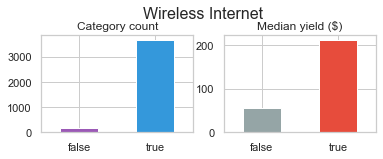

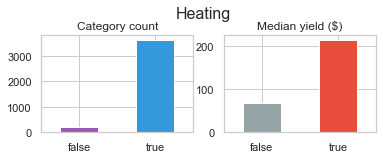

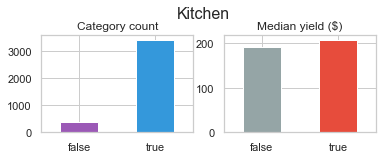

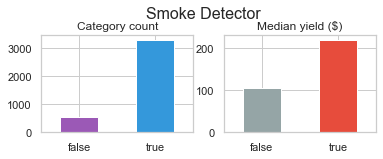

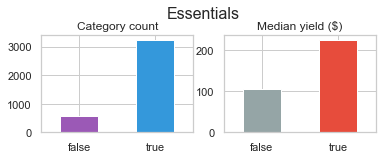

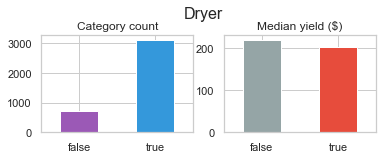

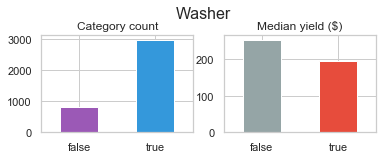

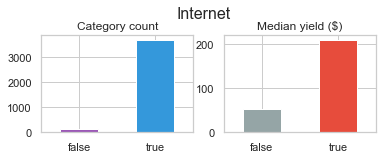

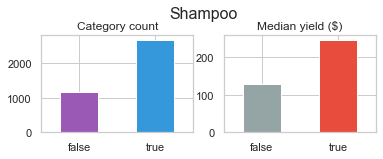

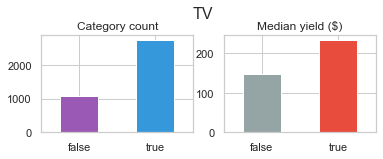

In [132]:
for col in listings_clean.iloc[:,43:53].columns:
    binary_count_and_price_plot(col, figsize=(6,2))

The plots show above tell us that though the top 10 amenities are provided as a considerable proportion of all the listings, not every one of them contributes to better yield, such as dryer and washer.

### Interavtive Relationshiop

__Yield vs. Availability_90 by host_is_superhost__
We visualize the relationship between the `yield` and the `availability_90`, and there's a slight trend that the greater yield prefers the longer availability with 90 days. And we also differentiate this relationship by `host_is_superhost`, view the plot as a whole, the super hosts have a better yield than those who are not.

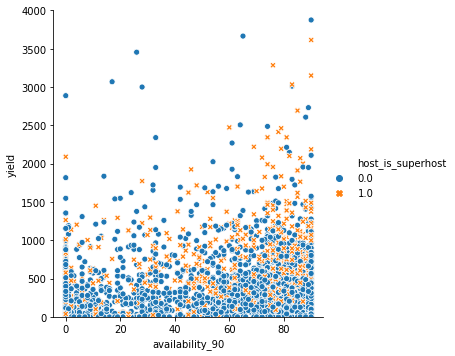

In [103]:
sns.relplot(x="availability_90", y="yield", hue='host_is_superhost',  style="host_is_superhost", data=listings_clean)
plt.ylim(0,4000)
plt.show()

__yield vs. accommodates__
<br>
The plots indicate that the Entire home/apt has the best yield, and the private room, and last the shared room. And also, since the entire home/apt have the capacity for bigger groups, that's the advantage for families with more people over other choices among the market.

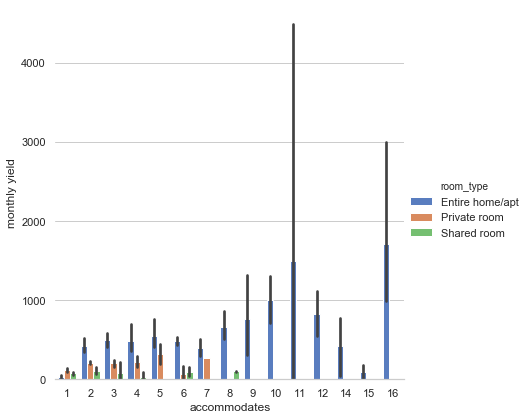

In [112]:
sns.set(style="whitegrid")
# Draw a nested barplot 
g = sns.catplot(x="accommodates", y="yield", hue="room_type", data=listings_clean,height=6, kind="bar", palette="muted")
g.despine(left=True)
g.set_ylabels("monthly yield")
plt.show()

### Geographical Information

__Grograpical Location__
The average yield that grouped by neighborhood indicate the central area - downtown, Queen Anne and Ballard obtain the best yield among other areas, whereas the university district and lake city have the least - which make sense, the central area is closer to the mall, bar and any entertainment and bring in the better yields.
<br>
And we also visualized the average review count per month and average yield using geographical data, which shows a consistent pattern.

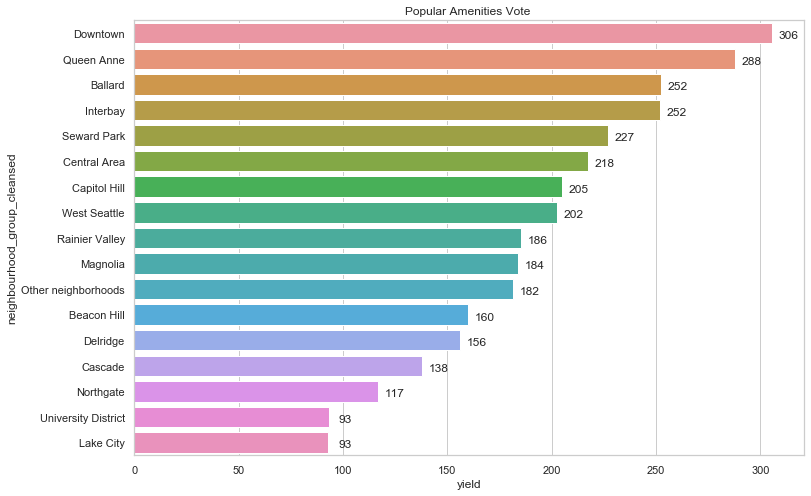

In [181]:
plt.rcParams["figure.figsize"] = [12, 8]
neighbourhood_yeild = listings_clean.groupby(["neighbourhood_group_cleansed"])['yield'].aggregate(np.median).reset_index().sort_values('yield',ascending = False)
kplot= sns.barplot(x='yield', y='neighbourhood_group_cleansed', data=neighbourhood_yeild, order=neighbourhood_yeild['neighbourhood_group_cleansed'])  
 
## Adding text
for p in kplot.patches:
    width = p.get_width()
    kplot.text(width + 8  ,
            p.get_y()+p.get_height()/2.+ .2 ,
            '{:1.0f}'.format(width),
            ha="center")
## Adding title
kplot.set_title("Neighbourhood Group ")  
plt.show()

In [162]:
def generateBaseMap(default_location=[47.623601, -122.328874], default_zoom_start=12):
    base_map = folium.Map(location=default_location, control_scale=True, zoom_start=default_zoom_start)
    return base_map

#### Geographical Pattern for Average Review per Month

In [185]:
# Heatmap for reviews_per_month grouped by geographical location
base_map_review = generateBaseMap()
HeatMap(data=listings_clean[['latitude', 'longitude', 'reviews_per_month']].groupby(['latitude', 'longitude']).mean().reset_index().values.tolist(), radius=8, max_zoom=13).add_to(base_map_review)
base_map_review

#### Geographical Pattern for Average Yield

In [184]:
# Heatmap for yield grouped by geographical location
base_map_yield = generateBaseMap()
HeatMap(data=listings_clean[['latitude', 'longitude', 'yield']].groupby(['latitude', 'longitude']).median().reset_index().values.tolist(), radius=8, max_zoom=13).add_to(base_map_yield)
base_map_yield

## 4. Summary 
<a id = "sum"></a>
<br>
We are done with our exploratory data analysis, and we will wrap up the data wrangling part by writing the cleaned data as final dataset, which will be used for the data modeling part. 

In [192]:
## Drop Freatured kept for EDA
EDA_drop = ['host_id', 'host_since', 'zipcode', 'latitude', 'longitude', 'minimum_nights', 
            'reviews_per_month', 'price','first_review', 'last_review']
for feat in listings_clean.columns:
    if feat in EDA_drop:
        listings_clean = drop(listings_clean, feat)

## Write the cleaned data
listings_clean.to_csv("listings_clean.csv")

Dropping minimum_nights...
